# Implementing and Training an Artificial Neuron From Scratch

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

This notebook is based on Udacity's *Deep Learning Nanodegree*.

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.


In [1]:
# colab settings
colab = False
if 'google.colab' in str(get_ipython()):
    colab = True
    from google.colab import drive
    drive.mount('/content/drive/')
    myPath = '/content/drive/My Drive/Colab_Notebooks/Porsche/'
    !cd "$myPath"
else:
    myPath = ''

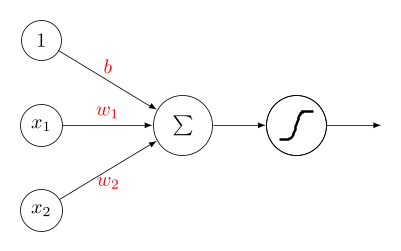

In [2]:
from IPython.display import Image
Image(myPath+"images/NN.png")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    blue = plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    red = plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    plt.legend((blue, red), ('accepted', 'rejected'))
    plt.xlabel('Test')
    plt.ylabel('Grade')
    plt.title('University acceptance')
    plt.xlim(0, 1)
    plt.xticks(np.arange(0, 1.1, step=0.2), ['0%', '20%', '40%', '60%', '80%', '100%'])
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, step=0.2), ['0%', '20%', '40%', '60%', '80%', '100%'])

def display(m, b, color='g--'):
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## 1. Reading and plotting the data

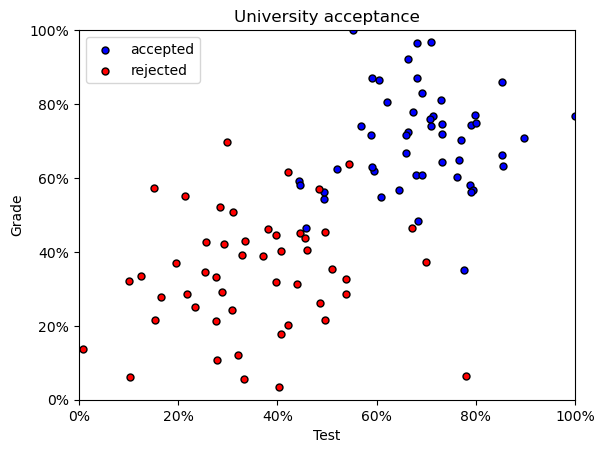

In [4]:
data = pd.read_csv(myPath+'data/university.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## 2. Implementing the basic functions

Now we implement the following formulas in the code cell below:

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Loss function

$$L(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights (note that the gradient of the loss is $\frac{\partial\mathcal L}{\partial w_i} =  (\hat{y}-y)\cdot x_i$ - you can calculate this using the chain rule as an extra challenge):

$$ w_i \longrightarrow w_i-\alpha
\frac{\partial\mathcal L}{\partial w_i}=w_i - \alpha (\hat{y} - y) x_i$$

$$ b \longrightarrow b - \alpha (\hat{y} - y)$$

**TODO:** Go through the functions below and confirm that each function returns the correct result!

In [5]:
# Activation (sigmoid) function
def sigmoid(x):
    # x is a scalar
    # the function returns a scalar

    sigma = 1 / (1 + np.exp(-x))

    return sigma

# Output (prediction) formula
def output_formula(features, weights, bias):
    # features is a 1D array of shape (n_features,) or a 2D array of shape (n_samples, n_features) (if called with all samples at once for validation)
    # weights is a 1D array of shape (n_features,)
    # bias is a scalar
    # the function returns a scalar or a 1D array of shape (n_samples,) (if called with all samples at once for validation)

    yhat = sigmoid(np.dot(features, weights) + bias)

    return yhat

# Error (log-loss) formula
def error_formula(y, output):
    # y and output are scalars
    # the function returns a scalar

    loss = - y * np.log(output) - (1 - y) * np.log(1 - output)

    return loss

# Gradient descent step (return updated weights and bias)
def update_weights(x, y, weights, bias, learnrate):
    # x is a 1D array of shape (n_features,)
    # y is a scalar
    # weights is a 1D array of shape (n_features,)
    # bias is a scalar
    # learnrate is a scalar

    output = output_formula(x, weights, bias)
    d_error = output - y # difference between prediction and true label
    weights -= learnrate * d_error * x # update with gradient descent (-grad(L) calculated by chain rule)
    bias -= learnrate * d_error

    return weights, bias

## 3. Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

**TODO:** Go through the code cell below and try to understand the code. Then, check the plot result below. You will see that the decision boundary does not separate blue from red points correctly. Try to change the number of epochs (=train runs using all data points once) to improve the decision boundary! Which number of epochs would you suggest?

**ANSWER:** 

In [6]:
np.random.seed(44)

epochs =10
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.title("Solution boundary (black line) with intermediate lines (green dashed lines)")
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## 4. Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7129867842771556
Accuracy:  0.4

========== Epoch 1 ==========
Train loss:  0.6972250813813179
Accuracy:  0.54

========== Epoch 2 ==========
Train loss:  0.6864949349657672
Accuracy:  0.53

========== Epoch 3 ==========
Train loss:  0.6776900593614118
Accuracy:  0.53

========== Epoch 4 ==========
Train loss:  0.6695548154546266
Accuracy:  0.51

========== Epoch 5 ==========
Train loss:  0.6616257167876847
Accuracy:  0.53

========== Epoch 6 ==========
Train loss:  0.6537616290684518
Accuracy:  0.54

========== Epoch 7 ==========
Train loss:  0.645943394141241
Accuracy:  0.54

========== Epoch 8 ==========
Train loss:  0.6381913962402899
Accuracy:  0.55

========== Epoch 9 ==========
Train loss:  0.6305335142083969
Accuracy:  0.57


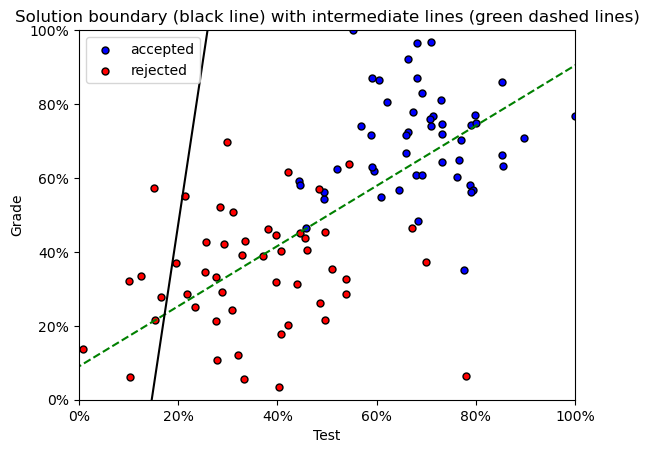

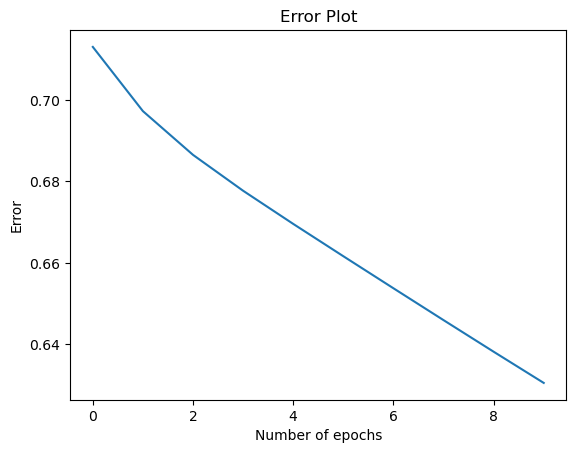

In [7]:
train(X, y, epochs, learnrate, True)

**TODO:** Go back to the train loop and try to find a) a learning rate that is too small and b) a learning rate that is too big. How can you see this in the plots?

**ANSWER:** 